<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/SW_Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd

In [0]:
# Ames Iowa Housing Dataset
'''
How would I access this dataset without having the url provided?
'''
url_data = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

iowa= pd.read_csv(url_data)



In [125]:
#look at several rows of data

iowa.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
801,802,30,RM,40.0,4800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,7,1916,1990,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,197,Unf,0,999,1196,GasA,Ex,Y,FuseA,1196,0,0,1196,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109900
1400,1401,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1929,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,862,862,GasA,TA,Y,SBrkr,950,208,0,1158,0,0,1,0,3,1,TA,5,Typ,1,Gd,BuiltIn,1929.0,RFn,1,208,TA,TA,Y,0,0,112,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,120000
506,507,60,RL,80.0,9554,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,GLQ,380,Unf,0,397,777,GasA,Ex,Y,SBrkr,1065,846,0,1911,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1993.0,RFn,2,471,TA,TA,Y,182,81,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,215000
253,254,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1964,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,108.0,TA,TA,CBlock,Gd,TA,Gd,LwQ,270,ALQ,580,452,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,0,1,2,0,3,1,Gd,7,Min1,0,NaN,Attchd,1964.0,RFn,1,309,TA,TA,Y,333,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2007,CWD,Normal,158000
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,180500


In [126]:
# Find the shape, that is number of rows and columns
iowa.shape

(1460, 81)

In [127]:
# get basic statistics from two numeric columns

iowa[['LotArea','YearBuilt']].describe()

,LotArea,YearBuilt
count,1460.000000,1460.000000
mean,10516.828082,1971.267808
std,9981.264932,30.202904
min,1300.000000,1872.000000
25%,7553.500000,1954.000000
50%,9478.500000,1973.000000
75%,11601.500000,2000.000000
max,215245.000000,2010.000000


In [128]:
# take a look at column types
# display max rows, if number is >= actual number, does not truncate row list

pd.set_option('display.max_rows',100)
iowa.dtypes[:]


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [129]:
#Look at the first 10 values of a column to guess the datatype
# see if you are correct, however looking with either head or sample provides
# the answer
iowa['TotRmsAbvGrd'].sample(10
                            )

885     5
357     6
441     8
881     7
1003    8
445     7
1229    7
481     6
392     5
642     9
Name: TotRmsAbvGrd, dtype: int64

In [130]:
# call column using dot method
iowa.Heating.sample(5)

927    GasA
285    GasA
131    GasA
47     GasA
572    GasA
Name: Heating, dtype: object

In [131]:
# call with preferred brace method

iowa['Heating'].sample(5)

922    GasA
52     GasA
518    GasA
993    GasA
317    GasA
Name: Heating, dtype: object

In [132]:
# call multiple columns
iowa[['Heating', 'Fireplaces']].sample(12)

,Heating,Fireplaces
628,GasA,2
660,GasA,1
684,GasA,0
425,GasA,2
800,GasA,0
833,GasA,0
150,GasA,0
1403,GasA,0
634,GasA,0
1114,GasA,0


In [133]:
# Look at the first ten rows of 'LotFrotage' column
iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [134]:
# What is the most common LotFrontage value

# iowa.LotFrontage.values
# not quite what we wanted

# iowa['LotFrontage'].describe()
# still not quite what we wanted

iowa['LotFrontage'].value_counts()


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [135]:
# LotFrontage contains NaN, not a number values, which are classified as floats
# pandas classifies all items in a column as the same type
# verify

import numpy as np
print(np.nan)
type(np.nan)

nan


float

In [136]:
#how many missing values (NaN) in the LotFrontage column?
iowa['LotFrontage'].isnull().sum()

259

In [137]:
# how many rows again?
iowa.shape

(1460, 81)

Begin cleaning data in iowa

In [0]:
# drop NaN (missing data), rows
iowa['LotFrontage'].dropna(inplace=True)

In [139]:
# did it stick?
iowa['LotFrontage'].isnull().sum()


0

In [140]:
iowa['LotFrontage'].dtype

dtype('float64')

Make New Features

In [141]:
# Make a smaller data_fram from iowa
small=iowa[['TotalBsmtSF','1stFlrSF', '2ndFlrSF','SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
73,1086,1086,0,144900
63,576,902,808,140000
1351,858,858,858,171000


In [142]:
# make a new column for totatl square footage
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [143]:
# Add another column for pricer per square foot
small['PricePerSF'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
42,840,884,0,144000,1724,83.526682
880,1090,1090,0,157000,2180,72.018349
637,811,811,576,93000,2198,42.311192
0,856,856,854,208500,2566,81.254871
1019,1362,1506,0,213490,2868,74.438633


Price per square foot reflects a value that cannot be discerned just from sale
price.

In [144]:
#Begin using crosstabs on catagorical data, start by making a list of 
# columns
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [145]:
# Select some catagorical columns to look at
iowa[['RoofStyle', 'RoofMatl','SaleCondition']].sample(5)

,RoofStyle,RoofMatl,SaleCondition
1294,Hip,CompShg,Normal
583,Gable,CompShg,Normal
859,Gable,CompShg,Normal
1150,Gable,CompShg,Normal
570,Gable,CompShg,Normal


In [146]:
# Find out how many options are available for SaleCondition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [147]:
#create a new catagorical variable, and count the instances, np.where works well
# when there are only two options desired
iowa['NormalCondition'] = np.where(iowa['SaleCondition']== 'Normal', 1, 0)
iowa['NormalCondition'].value_counts()

1    1198
0     262
Name: NormalCondition, dtype: int64

In [148]:
#Lets look at the LotShape column
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [149]:
# Reduce LotShape to have only 3 values

iowa['LotShape3'] = iowa['LotShape'].map({'Reg' : 'Regular',
                                         'IR1' : 'Irregular',
                                         'IR2' : 'Other',
                                         'IR3' : 'Other'})

iowa['LotShape3'].value_counts()


Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [150]:
# Find the values for another column of catagorical data
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [151]:
# We want to reduce these values, but the map funcition would be
# too much work, create an intermediate column to use
iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head (6)

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge
5,All Others,Mitchel


In [152]:
# Now change the columns desired in the newly created column
iowa.loc[iowa['Neighborhood'] == 'NAmes','top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)


,top_neighbors,Neighborhood
114,All Others,Crawfor
713,All Others,BrkSide
1234,All Others,SWISU
822,All Others,Gilbert
1160,All Others,NPkVill
294,North Ames,NAmes
622,All Others,Sawyer
1051,All Others,CollgCr
17,All Others,Sawyer
1003,All Others,NWAmes


In [153]:
# Repeat as desired to
iowa.loc[iowa['Neighborhood'] == 'CollgCr','top_neighbors'] = 'College Circle'
iowa.loc[iowa['Neighborhood'] == 'OldTown','top_neighbors'] = 'Old Town'
iowa.loc[iowa['Neighborhood'] == 'Edwards','top_neighbors'] = 'Edwards'
iowa.loc[iowa['Neighborhood'] == 'Somerst','top_neighbors'] = 'Choice Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Gilbert','top_neighbors'] = 'Choice Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'NridgHt','top_neighbors'] = 'Choice Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)


,top_neighbors,Neighborhood
1412,North Ames,NAmes
639,All Others,Blmngtn
567,Choice Neighborhood,NridgHt
1328,Old Town,OldTown
527,Choice Neighborhood,NridgHt
1311,College Circle,CollgCr
991,Old Town,OldTown
1269,North Ames,NAmes
1451,Choice Neighborhood,Somerst
811,College Circle,CollgCr


In [154]:
#verify that top_neighbors has the values desired
iowa['top_neighbors'].value_counts()

All Others             630
Choice Neighborhood    242
North Ames             225
College Circle         150
Old Town               113
Edwards                100
Name: top_neighbors, dtype: int64

In [155]:
# Use crosstabs to compare lot shape by neighborhood
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,233,19,378
Choice Neighborhood,104,16,122
College Circle,53,11,86
Edwards,17,1,82
North Ames,66,2,157
Old Town,11,2,100


In [156]:
# Adding the margins {word that entirely escapes my mind} will add totals
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins = True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,233,19,378,630
Choice Neighborhood,104,16,122,242
College Circle,53,11,86,150
Edwards,17,1,82,100
North Ames,66,2,157,225
Old Town,11,2,100,113
All,484,51,925,1460


In [157]:
# Adding indexes as well as margins give proportions
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize = 'index', margins = True)


LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.369841,0.030159,0.600000
Choice Neighborhood,0.429752,0.066116,0.504132
College Circle,0.353333,0.073333,0.573333
Edwards,0.170000,0.010000,0.820000
North Ames,0.293333,0.008889,0.697778
Old Town,0.097345,0.017699,0.884956
All,0.331507,0.034932,0.633562


In [158]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize = 'columns', margins = True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.481405,0.372549,0.408649,0.431507
Choice Neighborhood,0.214876,0.313725,0.131892,0.165753
College Circle,0.109504,0.215686,0.092973,0.102740
Edwards,0.035124,0.019608,0.088649,0.068493
North Ames,0.136364,0.039216,0.169730,0.154110
Old Town,0.022727,0.039216,0.108108,0.077397


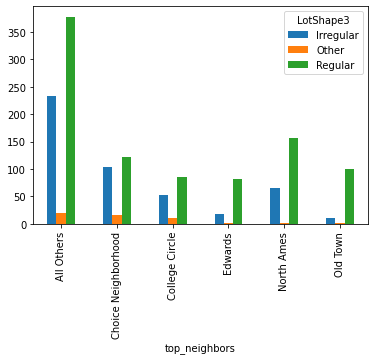

In [159]:
# Make a chart
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind = 'bar');

In [0]:
# Make a horizonal bar chart, it will better display the information

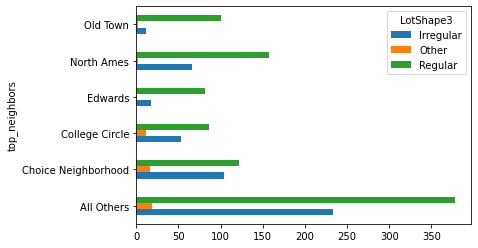

In [161]:
myresults.plot(kind = 'barh');

In [162]:
#compare quality across neighborhoods
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,Choice Neighborhood,College Circle,Edwards,North Ames,Old Town
OverallQual,,,,,,
1,1,0,0,1,0,0
2,3,0,0,0,0,0
3,6,0,0,5,3,6
4,52,1,1,25,20,17
5,168,3,28,38,113,47
6,185,46,24,23,74,22
7,122,93,71,5,12,16
8,78,61,23,0,3,3
9,10,29,3,1,0,0


Begin working with a new dataset focusing on Strings in Pandas

In [163]:
# new dataset, wget loads it locally? It provides a zipped file name at the bottom

! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2020-05-11 20:51:57--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.71.0.232, 52.26.240.115, 50.112.20.251
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.71.0.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.2’

LoanStats_2018Q4.cs     [   <=>              ]  22.05M  1.67MB/s    in 14s     

2020-05-11 20:52:12 (1.54 MB/s) - ‘LoanStats_2018Q4.csv.zip.2’ saved [23121687]



In [164]:
# zip file
# unzip using bash
! unzip  LoanStats_2018Q4.csv.zip



Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [165]:
# Now there is a readable csv file
loans = pd.read_csv('LoanStats_2018Q4.csv')

#inspect head
loans.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [166]:
# inspect tail
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [167]:
#Bold text means the data is interpreted as index
#This is because the file was set up in Excell with an extra blank row
#at the top & two total rows at the bottom
#fix the header & footer in one fell swoop

loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,0.0,May-2019,9698.79,NaN,Dec-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,15470,1,1,0,1,18.0,4888,65.0,1,3,2969,60.0,18100,2,0,2,4,1719.0,4906.0,67.3,0,0,133.0,333,2,2,1,2.0,NaN,1.0,NaN,0,4,6,5,15,6,8,23,6,11,0.0,0,0,1,100.0,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,789.07,0.0,0.0,0.0,Mar-2020,215.28,Apr-2020,Apr-2020,0,61.0,1,Individual,NaN,NaN,NaN,0,0,40223,4,12,2,2,5.0,33482,97.0,7,12,3662,79.0,16200,2,0,4,14,1749.0,7694.0,42.2,0,0,88.0,72,1,1,0,3.0,NaN,5.0,61.0,2,6,10,6,6,14,11,16,10,24,0.0,0,0,9,93.3,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,0.0,Feb-2019,4553.46,NaN,Feb-2020,0,25.0,1,Individual,NaN,NaN,NaN,0,306,29137,2,1,1

In [168]:
loans.tail()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,Dec-2018,797.53,NaN,Nov-2018,0,NaN,1,Individual,NaN,NaN,NaN,0,0,259658,4,2,3,3,6.0,18149,86.0,4,6,12843,56.0,51500,2,2,5,11,21638.0,26321.0,44.1,0,0,12.0,397,4,4,6,5.0,22.0,4.0,22.0,0,4,5,7,14,3,9,19,5,12,0.0,0,0,7,96.4,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,4442.75,1790.59,0.0,0.0,0.0,Apr-2020,346.76,May-2020,Apr-2020,0,NaN,1,Individual,NaN,NaN,NaN,0,155,77424,0,1,0,0,34.0,200,10.0,1,1,1866,42.0,15200,2,0,0,2,7039.0,4537.0,50.1,0,0,34.0,434,11,11,3,11.0,6.0,17.0,6.0,0,3,5,5,6,1,8,11,5,11,0.0,0,0,1,73.3,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,2248.21,804.96,0.0,0.0,0.0,Apr-2020,169.83,May-2020,Apr-2020,0,NaN,1,Individual,NaN,

In [169]:
#inspect for Nan values, missing data
#sum by column and sort from greatest to least

pd.set_option('display.max_rows', 144)
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

Clean up the interest rate column

In [170]:
# We want the data type to be float

loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [171]:
# Data type is object, what does it look like?
loans['int_rate'][5]

' 16.14%'

In [172]:
# confirm that the object is a string
type(loans['int_rate'][5])

str

To change all of the values in a column, begin by fixing one.

Here we need to turn the string into a float, by getting rid of the space and %, theny changing the type.


In [0]:
# first hard code a string variable
intrate = ' 16.14%'

In [174]:
#remove space
intrate.strip()

'16.14%'

In [175]:
#remove %
intrate.strip().strip('%')

'16.14'

In [176]:
#now turn it into a float, this is called casting
float('16.14')

16.14

In [0]:
#combine all of the steps

In [178]:
float(intrate.strip().strip('%'))

16.14

In [179]:
# verify your work
type(float(intrate.strip().strip('%')))

float

Make a function to apply to the column

In [180]:
intrate = ' 25.01%'

def myfunc(myinput):
  return float(myinput.strip().strip('%'))

myfunc(intrate)

25.01

In [181]:
# check data type
type(myfunc(intrate))

float

Now the function can be applied to the entire column

In [182]:
#for loop, we are creating a list that will be read into the column
new_list=[]
for cell in loans['int_rate']:
  new_list.append(myfunc(cell))

#apply it, check outcome
new_list[:10]


[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [183]:
#look at original values
# loans['int_rate'].head()

#we want to see the strings defined
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
#convert the list to a new column
loans['int_rate_clean'] = pd.Series(new_list)

In [185]:
#compare columns to see if it worked
loans[['int_rate', 'int_rate_clean']].sample(7)

,int_rate,int_rate_clean
113628,17.97%,17.97
23830,11.31%,11.31
57227,20.89%,20.89
17265,14.47%,14.47
24150,10.72%,10.72
44607,8.19%,8.19
88261,15.02%,15.02


In [186]:
# check data type
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
#try the handy, dandy .apply function
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [188]:
loans[['int_rate_clean2', 'int_rate_clean']].sample(7)

,int_rate_clean2,int_rate_clean
126753,16.91,16.91
38647,13.56,13.56
66653,13.56,13.56
3517,11.31,11.31
96119,12.73,12.73
59640,10.72,10.72
6074,8.19,8.19


Clean up the employment title column

In [189]:
#look at first 20 rows
loans['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [190]:
# What are the top 20 employment titles?
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [191]:
#How many unique titles?
print(loans.shape)

# loans['emp_title'].nuinque()
# method does not work???
len(loans['emp_title'].unique())

(128412, 146)


43893

In [0]:
import numpy as np

In [0]:
# examples of title to clean up, to be used when testing our function


examples = ['manager', 'DIRECTOR OF SERVICE', ' sole proprietor', np.nan]

In [194]:
#two ways to see datatype
print(type('Supervisor'))
isinstance('Supervisor', str)

<class 'str'>


True

In [195]:
# step to strip out extra spaces
' sole proprietor'.title().strip()

'Sole Proprietor'

In [196]:
#Write the function!
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
      return 'Unknown'

# test
print(clean_title(np.nan))
clean_title(' sole proprietor')

Unknown


'Sole Proprietor'

In [197]:
#create a for loop
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))

mylist

['Manager', 'Director Of Service', 'Sole Proprietor', 'Unknown']

In [198]:
# Shorten that up
[clean_title(jobtitle) for jobtitle in examples]

['Manager', 'Director Of Service', 'Sole Proprietor', 'Unknown']

In [0]:
#apply the function
loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [200]:
# Does it work?
loans[['emp_title', 'clean_title']].sample(20)

,emp_title,clean_title
8524,Driver,Driver
86424,Bus Driver,Bus Driver
96785,Letter carrier,Letter Carrier
86518,Foreman,Foreman
9504,Sales Manager,Sales Manager
100071,NaN,Unknown
64435,NaN,Unknown
97808,Clinician II,Clinician Ii
70536,NaN,Unknown
63103,Operational Manager,Operational Manager


In [201]:
# What are the top 20 employment titles?
loans['clean_title'].value_counts(dropna=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: clean_title, dtype: int64

In [202]:
#How many unique titles?
print(loans.shape)

len(loans['clean_title'].unique())

(128412, 147)


34902

In [203]:
# How many Nan?
loans['clean_title'].isnull().sum()

0

Working with Dates and Times in Pandas


In [204]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,...,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_clean,int_rate_clean2,clean_title
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,0.0,May-2019,9698.79,NaN,Dec-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,15470,1,1,0,1,18.0,4888,65.0,1,3,2969,60.0,18100,2,...,1719.0,4906.0,67.3,0,0,133.0,333,2,2,1,2.0,NaN,1.0,NaN,0,4,6,5,15,6,8,23,6,11,0.0,0,0,1,100.0,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14,Sale Consultant
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,789.07,0.0,0.0,0.0,Mar-2020,215.28,Apr-2020,Apr-2020,0,61.0,1,Individual,NaN,NaN,NaN,0,0,40223,4,12,2,2,5.0,33482,97.0,7,12,3662,79.0,16200,2,...,1749.0,7694.0,42.2,0,0,88.0,72,1,1,0,3.0,NaN,5.0,61.0,2,6,10,6,6,14,11,16,10,24,0.0,0,0,9,93.3,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,11.80,Educator
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,0.0,Feb-2019,4553.46,NaN,Feb-2020,0,25

In [205]:
#list all columns, easier to read
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=147)

In [206]:
#check out a column containing dates
loans['issue_d'].head(
)

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [207]:
# create a for loop to find all columns with _d in header
mylst = []
for col in loans.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylst    

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [208]:
# list comprehension, a for loop in one line

my_date_cols = [col for col in loans.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [209]:
#check the format of issue_d column
type(loans['issue_d'] [0])

str

In [0]:
#lucky us, it's a common date format and Pandas can do magic
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)


In [211]:
loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [212]:
#check column data type
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [213]:
print(loans['new_issue_d'].dtype)
loans['new_issue_d'].dtype

datetime64[ns]


dtype('<M8[ns]')

In [214]:
loans['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [215]:
# dt accessor, it can find a specific piece of datetime data
loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d', 'new_issue_d', 'year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [216]:
#month
loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [217]:
#weekday
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

,issue_d,new_issue_d,year,month,weekday
23759,Dec-2018,2018-12-01,2018,12,5
508,Dec-2018,2018-12-01,2018,12,5
77295,Nov-2018,2018-11-01,2018,11,3
32228,Dec-2018,2018-12-01,2018,12,5
96728,Oct-2018,2018-10-01,2018,10,0
67178,Nov-2018,2018-11-01,2018,11,3
116551,Oct-2018,2018-10-01,2018,10,0
80788,Nov-2018,2018-11-01,2018,11,3
108238,Oct-2018,2018-10-01,2018,10,0
115383,Oct-2018,2018-10-01,2018,10,0


In [218]:
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()


,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [219]:
# date arithmatic
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()



,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [220]:
# what is the longest difference in days?
loans['day_diff'].value_counts().sort_index().tail()


-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

What is the longest credit history in our data?

In [221]:
type(loans['earliest_cr_line'] [0])

str

In [0]:
#lucky us, it's a common date format and Pandas can do magic

loans['oldest_credit'] = pd.to_datetime(loans['earliest_cr_line'], infer_datetime_format=True)

In [223]:
#lucky us, it's a common date format and Pandas can do magic
loans['long_credit'] = loans['new_issue_d'] - loans['oldest_credit']
loans['long_credit'].value_counts().sort_index().tail(1)

25171 days    1
Name: long_credit, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data